<a href="https://colab.research.google.com/github/aso1901102/cnn_tarain_mnist/blob/master/cnn_train_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# coding: utf-8
# CNN を使った学習の例

# Kerasとその他ライブラリをインポート
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks as callbacks
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [ ]:
# MNIST
from keras.datasets import mnist

# MNISTデータを読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#画像の正規化
# 3次元配列(60000, 28, 28)を2次元配列(60000, 28×28)に変換。
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
# 各要素の0～255をを255で割って0～1.0のデータに正規化。
x_train /= 255
x_test /= 255
# 正解データをOne-hotに変換。
y_train = keras.utils.to_categorical(y_train, 10)
y_test= keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
# 畳み込みニューラルネットワークのモデルを作成
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
# モデルのコンパイル
#model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# モデルの訓練（学習）
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=5) # 早期終了を設定
hist = model.fit(x_train, y_train, batch_size=128, epochs=10, callbacks=[earlyStopping], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 496us/step - loss: 1.0697 - accuracy: 0.7135 - val_loss: 0.3891 - val_accuracy: 0.8932
Epoch 2/10
48000/48000 [==============================] - 24s 491us/step - loss: 0.4041 - accuracy: 0.8817 - val_loss: 0.3072 - val_accuracy: 0.9116
Epoch 3/10
48000/48000 [==============================] - 24s 491us/step - loss: 0.3483 - accuracy: 0.8969 - val_loss: 0.2731 - val_accuracy: 0.9222
Epoch 4/10
48000/48000 [==============================] - 24s 491us/step - loss: 0.3129 - accuracy: 0.9067 - val_loss: 0.2499 - val_accuracy: 0.9298
Epoch 5/10
48000/48000 [==============================] - 24s 493us/step - loss: 0.2883 - accuracy: 0.9144 - val_loss: 0.2307 - val_accuracy: 0.9328
Epoch 6/10
48000/48000 [==============================] - 24s 490us/step - loss: 0.2654 - accuracy: 0.9213 - val_loss: 0.2159 - val_accuracy: 0.9388
Epoch 7/10
48000/48000 [==============================] 

In [ ]:
# 学習済みモデルをテスト(評価)する
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0]) # 損失
print('test acc:', score[1])  # 精度（正答率）

test loss: 0.16173526813685893
test acc: 0.9537000060081482


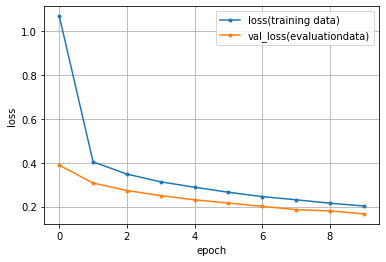

In [ ]:
# 学習結果を表示
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()